In [1]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('hg-mldl-master/fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)
fruits.shape

(300, 100, 100)

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)
pca.components_.shape

(50, 10000)

In [3]:
import import_ipynb
from SingleUtil import draw_fruits


importing Jupyter notebook from SingleUtil.ipynb


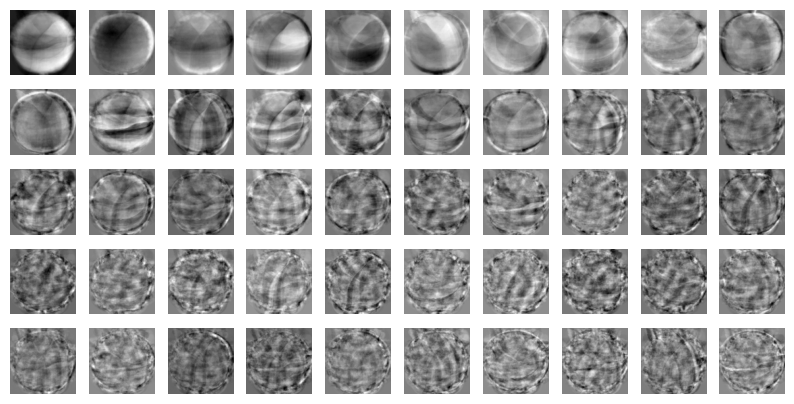

In [4]:
draw_fruits(pca.components_.reshape(-1, 100,100))

In [5]:
print(fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


In [6]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

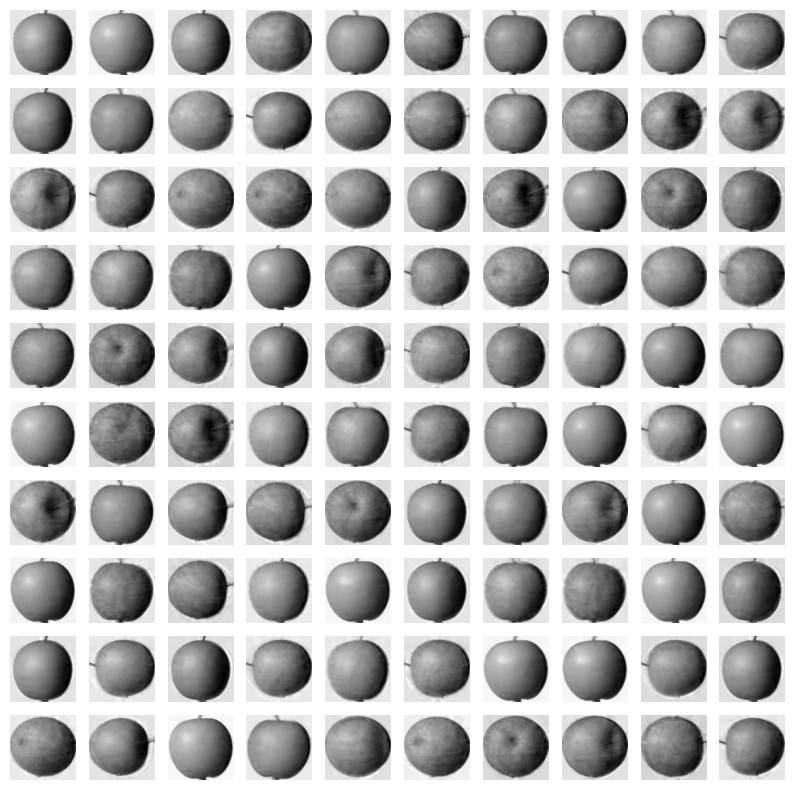

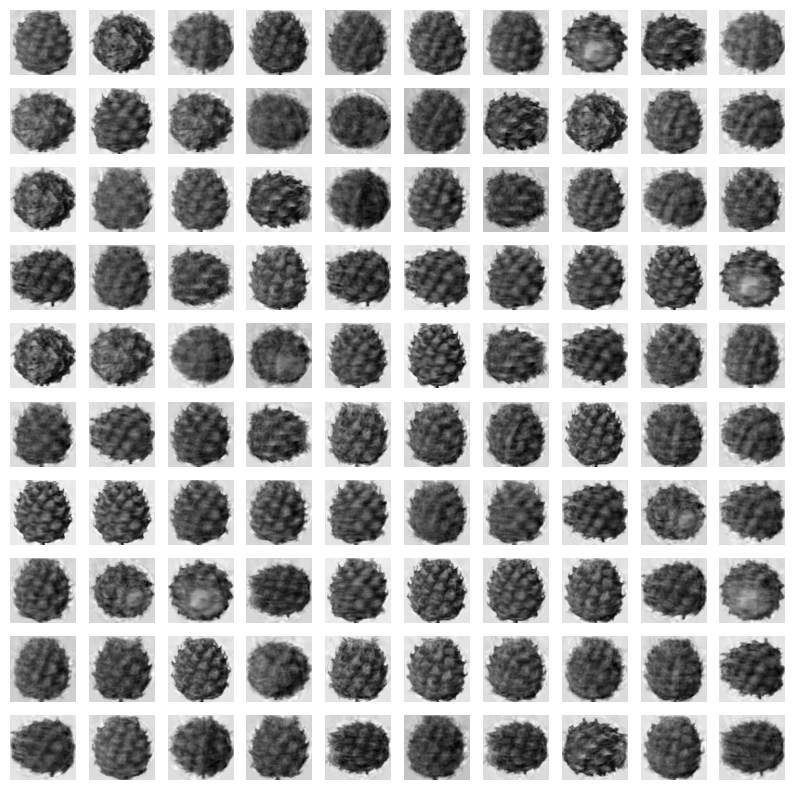

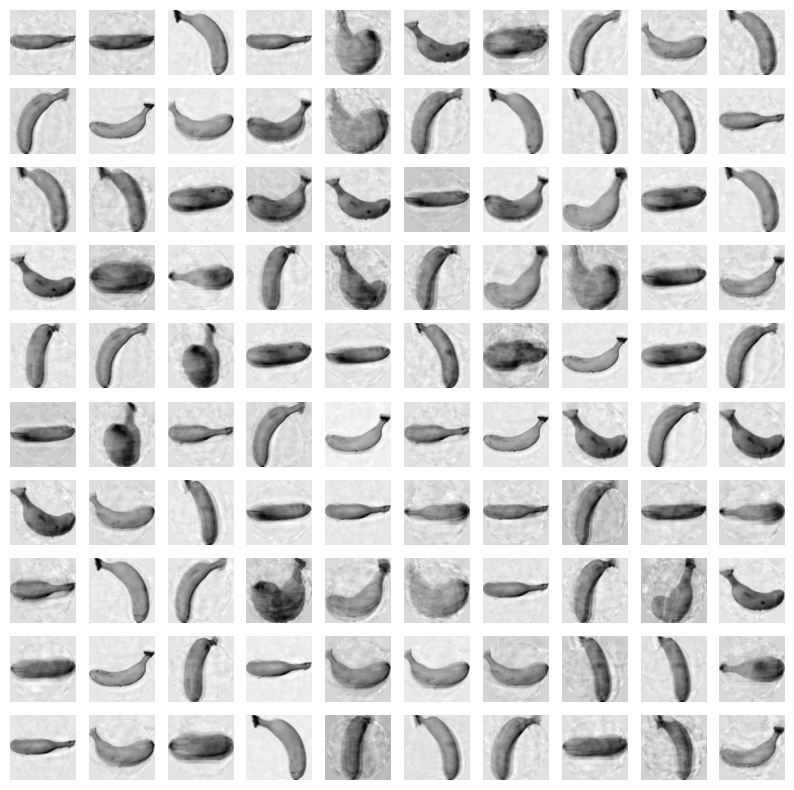

In [7]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

In [8]:
print(np.sum(pca.explained_variance_ratio_))

0.9215001460796726


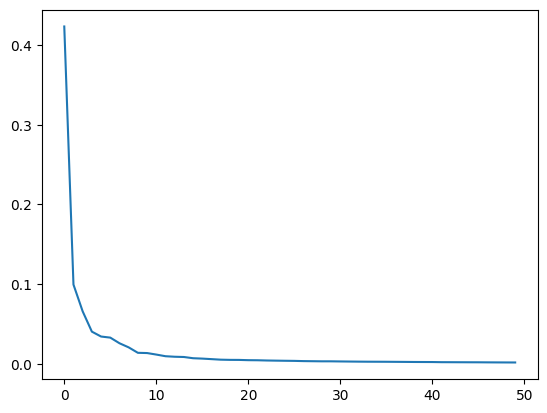

In [9]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
target = np.array([0]*100+[1]*100+[2]*100)


In [11]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

scores

0.9966666666666667
0.5451994895935058


{'fit_time': array([0.61899877, 0.49200034, 0.49699855, 0.49800062, 0.61999917]),
 'score_time': array([0.00300002, 0.00300121, 0.00300002, 0.00499916, 0.00300002]),
 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}

In [12]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

2


In [13]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [14]:

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

scores

0.9966666666666667
0.501999044418335


{'fit_time': array([0.66599846, 0.47499895, 0.45799923, 0.44300032, 0.46799827]),
 'score_time': array([0.00299978, 0.00300169, 0.0030005 , 0.00300002, 0.00300145]),
 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}

In [15]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts=True)

C:\Users\lotco\.conda\envs\311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(array([0, 1, 2]), array([110,  99,  91], dtype=int64))

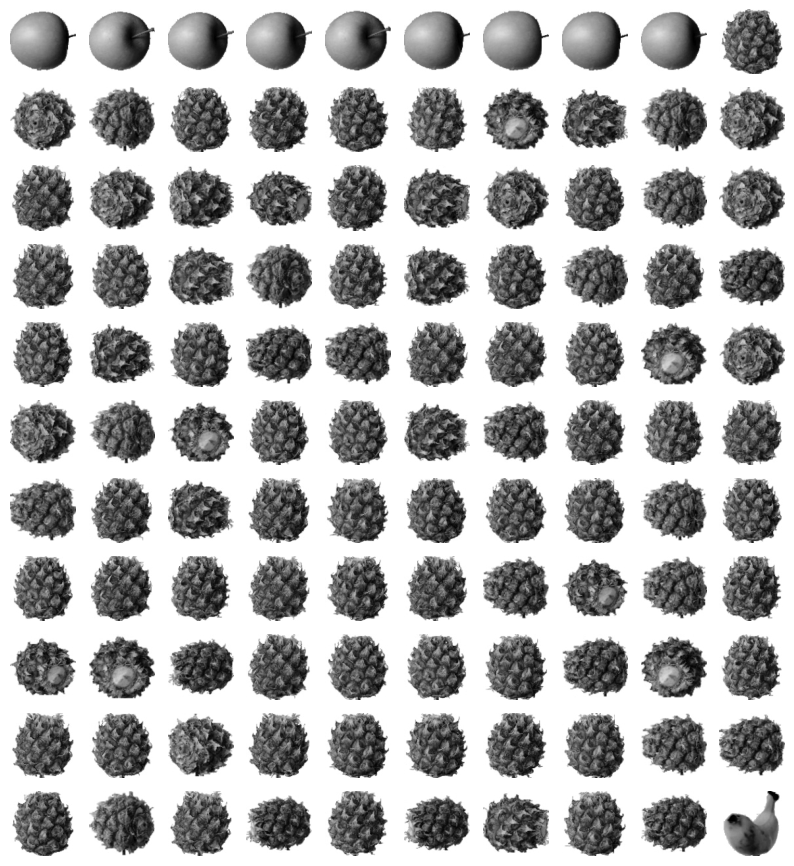

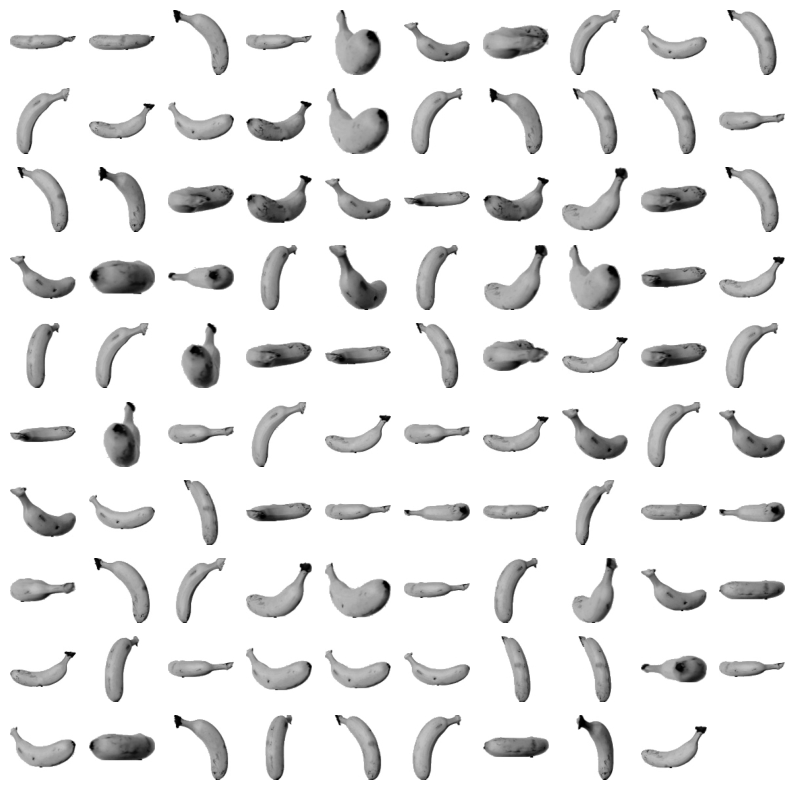

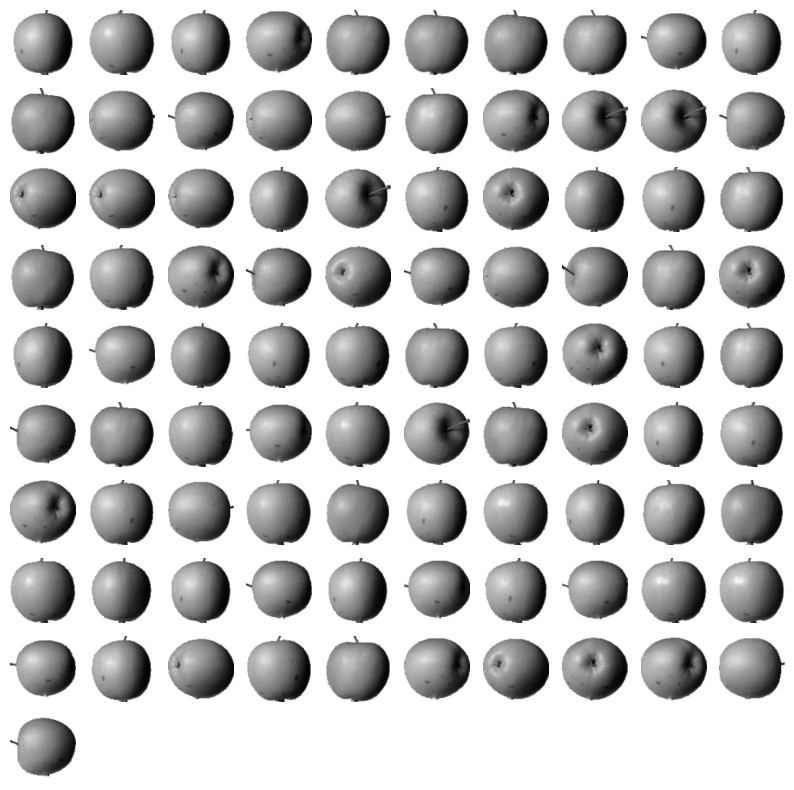

In [16]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

0
[-1556.73860341 -2641.95018377 -2063.01348637 -2031.32316791
 -2860.74601791 -1682.34573388 -1619.90106151 -1522.5025055
 -1755.67284459 -2748.52503988 -1718.65422384 -2665.64509875
 -2507.88795773 -2706.37041042 -2527.51759862 -2373.07250421
 -2286.11484284 -2049.9426979  -2663.68872032 -2254.03961645
 -2904.21051342 -2100.88738646 -2412.48005937  -976.7187988
 -2788.38246012 -2334.1415987  -1759.63320415 -2687.81157433
 -1885.02057839 -2022.76017768 -2602.72053322 -2337.83084801
 -2134.27354073 -2964.95285092 -2262.0689292  -1891.605049
 -2563.42114566 -2087.23899367 -2740.73189952 -2535.77493813
 -2417.39464414 -1764.84644165 -2823.64790411 -2636.84684269
 -2288.01592399 -2630.42710738 -2900.12226771 -2320.32081431
 -2345.87515433 -1777.77819381 -2210.57301355 -2348.10324421
 -1332.31738348 -2318.95052374 -2318.83358239 -1688.04416369
 -2044.5617155  -2759.94004664 -2403.50161452 -2473.28075963
 -2406.61715021 -2712.81733873 -1727.96418094 -2580.25872971
 -2525.6257985  -2686.1952

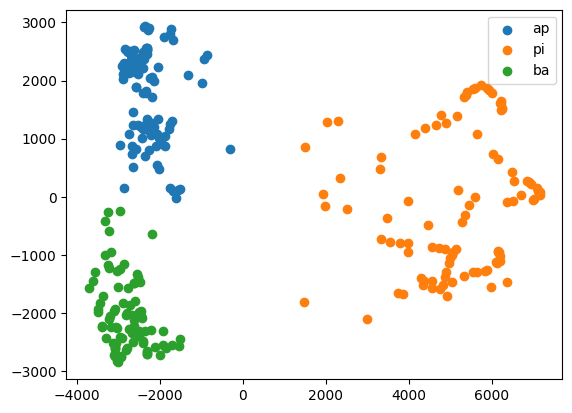

In [20]:
for label in range(0,3):
    print(label)
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
    print(data[:,0])
plt.legend(['ap','pi','ba'])
plt.show()